# Preliminary analysis of an own project

## 1. Goal

### Main question:
Is El Salvador's economy actually improving or declining?

### Subquestions:
- Where is El Salvador's economy right now?
- What is El Salvador's economy's growth rate?
- How long will it take for El Salvador's economy's size to double?
- How has El Salvador's econoomy fluctuated throughout the years?

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("datasets/indicators_slv.csv")
df1.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,El Salvador,SLV,1971,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,2642
2,El Salvador,SLV,1970,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,2500
3,El Salvador,SLV,1969,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,2400
4,El Salvador,SLV,1968,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,2300


## 2. Data Handling

### Reflections on my dataset:
The dataset at hand was collected by the World Bank Group (through member countries' statistical systems). This gives us a rather high degree of confidence in the quality and integrity of the data.

### What needs to be cleaned and preprocessed:
The original dataset's structure is quite far from ideal to work with, mainly because of its lack of a proper index (Originally "El Salvador", probably because it is extracted from a larger dataset where the index is the country's name). Therefore the first step will be to set the index to years. Then, given the large amount of different indicators (most of which I will not be using) and the fact that said indicators are spread through rows and not columns, I will create new columns from the indicators I will be taking into account. After removing unneeded indicators, I will be setting the values of the original "Value" column to their corresponding rows based on their year. Finally checking for any inconsistencies in data types and filling in missing values where needed.

In [19]:
df1.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis = 1, inplace=True)
df1.head()

,Year,Indicator Name,Value
0,#date+year,#indicator+name,#indicator+value+num
1,1971,"Agricultural machinery, tractors",2642
2,1970,"Agricultural machinery, tractors",2500
3,1969,"Agricultural machinery, tractors",2400
4,1968,"Agricultural machinery, tractors",2300


In [20]:
df_gdp = df1[(df1["Indicator Name"] == "GDP (current US$)") & (df1['Year'] <= "2018") & (df1['Year'] >= "2010")]
df_gdp.set_index('Year', inplace=True)
df_gdp.rename(columns={'Value': 'GDP (current US$)'}, inplace=True)
df_gdp.drop(['Indicator Name'], axis = 1, inplace=True)
df_gdp.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GDP (current US$)
Year,
2018,26117400000
2017,24979200000
2016,24191440000
2015,23438240000
2014,22593480000


In [21]:
df_gdp_growth = df1[(df1["Indicator Name"] == "GDP growth (annual %)") & (df1["Year"] <= "2018") & (df1["Year"] >= "2010")]
df_gdp_growth.set_index('Year', inplace=True)
df_gdp_growth.rename(columns={'Value': 'GDP growth (annual %)'}, inplace=True)
df_gdp_growth.drop(['Indicator Name'], axis = 1, inplace=True)
df_gdp_growth.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GDP growth (annual %)
Year,
2014,1.95194411277771
2013,1.84728670120239
2012,1.88095545768738
2011,2.21683549880981
2010,1.36478364467621


In [22]:
df_life_expectancy = df1[(df1["Indicator Name"] == "Life expectancy at birth, total (years)") & (df1["Year"] <= "2018") & (df1["Year"] >= "2010")]
df_life_expectancy.set_index('Year', inplace=True)
df_life_expectancy.rename(columns={'Value': 'Life expectancy at birth, total (years)'}, inplace=True)
df_life_expectancy.drop(['Indicator Name'], axis = 1, inplace=True)
df_life_expectancy.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,"Life expectancy at birth, total (years)"
Year,
2018,73.096
2017,72.872
2016,72.644
2015,72.412
2014,72.175


In [23]:
df1_clean = df_gdp.join([df_gdp_growth, df_life_expectancy])
df1_clean = df1_clean[~df1_clean.index.duplicated(keep='first')]
df1_clean.index = df1_clean.index.astype(int)
df1_clean[['GDP (current US$)', 'GDP growth (annual %)','Life expectancy at birth, total (years)']] = df1_clean[['GDP (current US$)', 'GDP growth (annual %)','Life expectancy at birth, total (years)']].astype(float)
df1_clean

,GDP (current US$),GDP growth (annual %),"Life expectancy at birth, total (years)"
Year,,,
2010,1.844800e+10,1.364784,71.210
2011,2.028400e+10,2.216835,71.449
2012,2.138600e+10,1.880955,71.692
2013,2.199097e+10,1.847287,71.935
2014,2.259348e+10,1.951944,72.175
2015,2.343824e+10,2.395028,72.412
2016,2.419144e+10,2.546533,72.644
2017,2.497920e+10,2.249942,72.872
2018,2.611740e+10,2.430960,73.096


### Reflections after cleaning & preprocessing:
Reorganizing the data into the single (and appropriately structured) dataframe was quite straight forward and is most definitely much clearer to understand and work with now. However, during the process, I realized that data for the 'Physicians (per 1000 people)' indicator was only available for 2 of the 8 year sample size I would be using in the investigation, so I decided to drop the column alltogether. Then after errors when trying to graph the data, I realized I had to convert the dates to integers and all other values to floats (from objects), for use in the upcoming visualizations. Finally, I also noticed there were duplicates for the years 2010-2014, resulting in a rather simple dropping of the second instance of each value.

## 3. Methods

### Which parts of the dataset are most relevant?
The indicators I will be using in this investigation are: GDP, GDP Growth, Life expectancy at birth, total (years). Although unfortunately, all except one are "incomplete" in how they do not cover the 2010-2018 timeframe chosen for said investigation. This means I will have to either count them as NA or find reliable values elsewhere.

### Which methods do I want to use to answer the questions?
- Standard deviations
- The rule of 70
- Seaborn visualizations, more specifically it's regplots
 
These 3 methods would quite clearly show whether or not El Salvador's economy (broadly speaking) is growing or declining. Also giving an idea of at what rate this is happening.

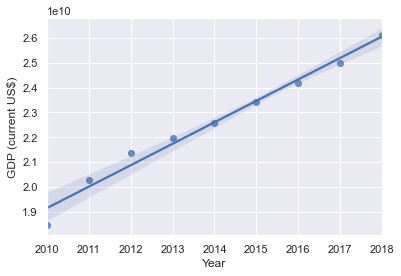

In [24]:
sns.set()

sns.regplot(x=df1_clean.index, y="GDP (current US$)", data=df1_clean)

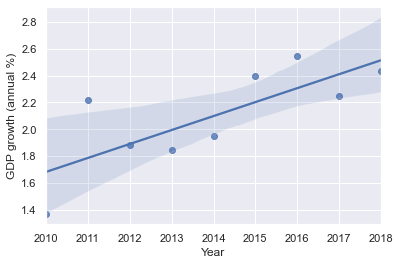

In [25]:
sns.regplot(x=df1_clean.index, y="GDP growth (annual %)", data=df1_clean)

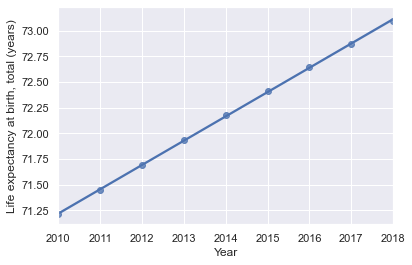

In [26]:
sns.regplot(x=df1_clean.index, y="Life expectancy at birth, total (years)", data=df1_clean)

In [27]:
gdp_std = df1_clean['GDP (current US$)'].std()
gdp_growth_std = df1_clean['GDP growth (annual %)'].std()
gdp_life_expectancy_std = df1_clean['Life expectancy at birth, total (years)'].std()
gdp_growth_mean = df1_clean['GDP growth (annual %)'].mean()

print("GDP std ($) =", gdp_std)
print("GDP Growth std (%)=", gdp_growth_std)
print("Life Expectancy std (years) =", gdp_life_expectancy_std)

print("El Salvador's GDP growth rate is in average", gdp_growth_mean)

GDP std ($) = 2390492818.1746216
GDP Growth std (%)= 0.37188409919063276
Life Expectancy std (years) = 0.6479265004612825
El Salvador's GDP growth rate is in average 2.0982521776965446


In [28]:
latest_growth_rate = df1_clean['GDP growth (annual %)'].iloc[-1]
ro70 = 70 / latest_growth_rate
ro70 = ro70.round(0).astype(int)

print("El Salvador's economy can be estimated to double in size in approximately", ro70, "years")

El Salvador's economy can be estimated to double in size in approximately 29 years


## 4. Results and discussion

### Individual Results
- Given the context of the indicators taken into consideration (namely GDP, GDP Growth rate, and life expectancy) and how strongly they relate to the state of a country's economy, it is safe to say that El Salvador's economy is in fact growing. Not only that, but also that it is doing so at a rather fast and steady rate.
- El Salvador's GDP has an average (between 2010 and 2018) growth rate of 2.1%, a relatively high figure when compared to those from other countries like Germany and its equal 2.1% figure for the same period of time.
- El Salvador's GDP has a rather large standard deviation of 2390492818, supporting the idea that the country's economy is changing (in this case for the better) at a high rate.
  El Salvador's GDP Growth and Life Expectancy's standard deviations of 0.37 and 0.65 respectively along with the data visualizations suggest a linear and consistent growth.
- El Salvador's economy can be estimated to double in size in approximately 29 years

### The big picture
- Is El Salvador's economy actually improving or declining? Results show quite clearly that El Salvador's economy is in fact, generally speaking, improving. Additionally, they show that it is growing at a relatively fast rate with an average GDP growth rate of 2.1, the same figure as germany (during the same timeframe as this investigation betweenm 2010 and 2018).
- This conclusion comes to me as somewhat of a reaffirmation. However when comparing it to "what is known" to the salvadoran people in general, this conclusion actually differs. Given a consistently negative perception of the political and governmental bodies of the country, most people assume and believe the country and subsequently its economy only gets worse as time goes by. Eventhough factual data is quite easy to attain with access to the internet, people will very rarely look into the matter. This, in my opinion only makes Salvadorans' negative self-perception even worse.
- Admittedly, this investigation could really benefit from both a larger sample size (a longer time frame) and the addition of a few more variables. These variables would ideally consist of literacy rate, infant mortality rate, human development index (HDI), birth & death rates, and gross national product (GNP), as these are widely known as the most relevant indicators of economic development.